In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [8]:
#importing the training data
train_data=pd.read_csv('C:/Users/sdandir/Desktop/projects/NLP/imdb_train.csv')
print(train_data.shape)
train_data.head(10)

(40000, 2)


,review,sentiment
0,We had STARZ free weekend and I switched on th...,negative
1,I'll admit that this isn't a great film. It pr...,negative
2,I finally found a version of Persuasion that I...,positive
3,The BBC surpassed themselves with the boundari...,positive
4,"Much praise has been lavished upon Farscape, b...",negative
5,"Of course the plot, script, and, especially ca...",positive
6,This is one of those road movies that would li...,negative
7,What an uninteresting hodge-podge. It could ha...,negative
8,Only a handful of the segments are engaging he...,negative
9,THE GREEN BUTCHERS (Anders Thomas Jensen - Den...,positive


In [9]:
train_data.describe()

,review,sentiment
count,40000,40000
unique,39724,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,20048


In [10]:
#sentiment count
train_data['sentiment'].value_counts()

positive    20048
negative    19952
Name: sentiment, dtype: int64

In [12]:
#split the dataset  
#train dataset
train_reviews=train_data.review[:32000]
train_sentiments=train_data.sentiment[:32000]
#test dataset
test_reviews=train_data.review[32000:]
test_sentiments=train_data.sentiment[32000:]
print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(32000,) (32000,)
(8000,) (8000,)


In [14]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sdandir\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [15]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [16]:
#Removing the html strips

def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
train_data['review']=train_data['review'].apply(denoise_text)

In [17]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
train_data['review']=train_data['review'].apply(remove_special_characters)

In [18]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
train_data['review']=train_data['review'].apply(simple_stemmer)

In [19]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
train_data['review']=train_data['review'].apply(remove_stopwords)

{'has', 'few', 'over', 'themselves', 'no', 'when', "should've", 'off', 'a', 'ourselves', 'to', "hasn't", 'very', 'about', 'at', 'those', 'after', 'his', 'there', 'of', 'more', 'once', "weren't", 'herself', 'that', 'my', 'isn', 'not', 'nor', 'haven', 're', 'she', 'most', 'm', 'weren', 'is', 't', 'ma', "doesn't", "didn't", 'he', 'for', 'them', 'who', 'and', 'itself', 've', 'ours', "wasn't", 'yourself', 'am', 'shouldn', "you've", 'himself', 'each', 's', 'we', 'aren', 'are', 'where', 'up', 'with', 'doing', 'mightn', 'but', 'because', 'what', 'it', 'than', 'didn', 'couldn', 'or', 'while', 'by', 'did', 'just', 'o', 'hadn', 'do', 'won', 'mustn', 'if', 'then', 'you', 'was', 'in', 'own', 'so', 'me', 'hasn', 'their', 'needn', "mustn't", 'd', "wouldn't", "mightn't", "isn't", 'during', 'have', 'myself', 'some', 'doesn', 'until', "aren't", 'such', "don't", 'll', 'under', 'don', 'should', "haven't", "you'd", "she's", "shouldn't", 'both', 'ain', 'further', 'through', 'can', 'our', 'above', 'hers', 'w

In [20]:
#normalized train reviews
norm_train_reviews=train_data.review[:32000]
norm_train_reviews[0]
#convert dataframe to string
#norm_train_string=norm_train_reviews.to_string()
#Spelling correction using Textblob
#norm_train_spelling=TextBlob(norm_train_string)
#norm_train_spelling.correct()
#Tokenization using Textblob
#norm_train_words=norm_train_spelling.words
#norm_train_words

'starz free weekend switch station see wa wa thi movi howl II act wa terribl eye candi wa great sybil dan marsha brown afor mention eye candi wa laugh lot scene sawmi friend wonder whi never want go horror movi saw thi film would know whi would get thrown laugh hardjust coupl trivia note reb brown play ben white play captain american made TV movi marsha brown wa mick jagger inspir song brown sugar mick ha great tast women sure'

In [22]:
#Normalized test reviews
norm_test_reviews=train_data.review[32000:]
norm_test_reviews[37005]
##convert dataframe to string
#norm_test_string=norm_test_reviews.to_string()
#spelling correction using Textblob
#norm_test_spelling=TextBlob(norm_test_string)
#print(norm_test_spelling.correct())
#Tokenization using Textblob
#norm_test_words=norm_test_spelling.words
#norm_test_words

'watch thi film without know anyth whatsoev found similar themat billi elliott 2000 film base around troubl fatherson relationship film son doe want follow hi father mine dream better life away home town son face deris classmat strong femal role model teach themth major differ found film wa octob ski wa infinit interest touch film laura dern put move perform chri cooper play disapprov father veri well went american beauti 1999 joe johnston surpris hi subtl direct veri differ hi directori featur jumanji 1995 jurass park iii 2001'

In [23]:
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train_reviews=cv.fit_transform(norm_train_reviews)
#transformed test reviews
cv_test_reviews=cv.transform(norm_test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)
#vocab=cv.get_feature_names()-toget feature names

BOW_cv_train: (32000, 5120175)
BOW_cv_test: (8000, 5120175)


In [24]:
#Tfidf vectorizer
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tv_train_reviews=tv.fit_transform(norm_train_reviews)
#transformed test reviews
tv_test_reviews=tv.transform(norm_test_reviews)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (32000, 5120175)
Tfidf_test: (8000, 5120175)


In [25]:
#labeling the sentient data
lb=LabelBinarizer()
#transformed sentiment data
sentiment_data=lb.fit_transform(train_data['sentiment'])
print(sentiment_data.shape)

(40000, 1)


In [26]:
#Spliting the sentiment data
train_sentiments=sentiment_data[:32000]
test_sentiments=sentiment_data[32000:]
print(train_sentiments)
print(test_sentiments)

[[0]
 [0]
 [1]
 ...
 [0]
 [1]
 [1]]
[[0]
 [1]
 [0]
 ...
 [1]
 [0]
 [0]]


In [27]:
#training the model
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train_reviews,train_sentiments)
print(lr_bow)
#Fitting the model for tfidf features
lr_tfidf=lr.fit(tv_train_reviews,train_sentiments)
print(lr_tfidf)

C:\Users\sdandir\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


C:\Users\sdandir\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [28]:
#Predicting the model for bag of words
lr_bow_predict=lr.predict(cv_test_reviews)
print(lr_bow_predict)
##Predicting the model for tfidf features
lr_tfidf_predict=lr.predict(tv_test_reviews)
print(lr_tfidf_predict)

[0 0 0 ... 1 0 0]
[1 0 0 ... 1 0 0]


In [29]:
#Accuracy score for bag of words
lr_bow_score=accuracy_score(test_sentiments,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)
#Accuracy score for tfidf features
lr_tfidf_score=accuracy_score(test_sentiments,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_bow_score : 0.736
lr_tfidf_score : 0.727


In [30]:
#Classification report for bag of words 
lr_bow_report=classification_report(test_sentiments,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)

#Classification report for tfidf features
lr_tfidf_report=classification_report(test_sentiments,lr_tfidf_predict,target_names=['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.75      0.72      0.73      4026
    Negative       0.73      0.75      0.74      3974

    accuracy                           0.74      8000
   macro avg       0.74      0.74      0.74      8000
weighted avg       0.74      0.74      0.74      8000

              precision    recall  f1-score   support

    Positive       0.76      0.67      0.71      4026
    Negative       0.70      0.79      0.74      3974

    accuracy                           0.73      8000
   macro avg       0.73      0.73      0.73      8000
weighted avg       0.73      0.73      0.73      8000



In [31]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,lr_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,lr_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[2990  984]
 [1128 2898]]
[[3128  846]
 [1338 2688]]


In [32]:
#training the linear svm
svm=SGDClassifier(loss='hinge',max_iter=500,random_state=42)
#fitting the svm for bag of words
svm_bow=svm.fit(cv_train_reviews,train_sentiments)
print(svm_bow)
#fitting the svm for tfidf features
svm_tfidf=svm.fit(tv_train_reviews,train_sentiments)
print(svm_tfidf)

C:\Users\sdandir\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=500, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=500, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


In [33]:
#Predicting the model for bag of words
svm_bow_predict=svm.predict(cv_test_reviews)
print(svm_bow_predict)
#Predicting the model for tfidf features
svm_tfidf_predict=svm.predict(tv_test_reviews)
print(svm_tfidf_predict)

[1 1 1 ... 1 0 1]
[1 1 1 ... 1 1 1]


In [34]:
#Accuracy score for bag of words
svm_bow_score=accuracy_score(test_sentiments,svm_bow_predict)
print("svm_bow_score :",svm_bow_score)
#Accuracy score for tfidf features
svm_tfidf_score=accuracy_score(test_sentiments,svm_tfidf_predict)
print("svm_tfidf_score :",svm_tfidf_score)

svm_bow_score : 0.50725
svm_tfidf_score : 0.49675


In [35]:
#Classification report for bag of words 
svm_bow_report=classification_report(test_sentiments,svm_bow_predict,target_names=['Positive','Negative'])
print(svm_bow_report)
#Classification report for tfidf features
svm_tfidf_report=classification_report(test_sentiments,svm_tfidf_predict,target_names=['Positive','Negative'])
print(svm_tfidf_report)

              precision    recall  f1-score   support

    Positive       1.00      0.02      0.04      4026
    Negative       0.50      1.00      0.67      3974

    accuracy                           0.51      8000
   macro avg       0.75      0.51      0.35      8000
weighted avg       0.75      0.51      0.35      8000

              precision    recall  f1-score   support

    Positive       0.00      0.00      0.00      4026
    Negative       0.50      1.00      0.66      3974

    accuracy                           0.50      8000
   macro avg       0.25      0.50      0.33      8000
weighted avg       0.25      0.50      0.33      8000



C:\Users\sdandir\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,svm_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,svm_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[3974    0]
 [3942   84]]
[[3974    0]
 [4026    0]]


In [37]:
#training the model
mnb=MultinomialNB()
#fitting the naive bayes for bag of words
mnb_bow=mnb.fit(cv_train_reviews,train_sentiments)
print(mnb_bow)
#fitting the naive bayes for tfidf features
mnb_tfidf=mnb.fit(tv_train_reviews,train_sentiments)
print(mnb_tfidf)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


C:\Users\sdandir\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


In [38]:
#Predicting the model for bag of words
mnb_bow_predict=mnb.predict(cv_test_reviews)
print(mnb_bow_predict)
#Predicting the model for tfidf features
mnb_tfidf_predict=mnb.predict(tv_test_reviews)
print(mnb_tfidf_predict)

[0 0 0 ... 1 0 0]
[0 0 0 ... 1 0 0]


In [39]:
#Accuracy score for bag of words
mnb_bow_score=accuracy_score(test_sentiments,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)
#Accuracy score for tfidf features
mnb_tfidf_score=accuracy_score(test_sentiments,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)


mnb_bow_score : 0.737125
mnb_tfidf_score : 0.735625


<function matplotlib.pyplot.show(*args, **kw)>

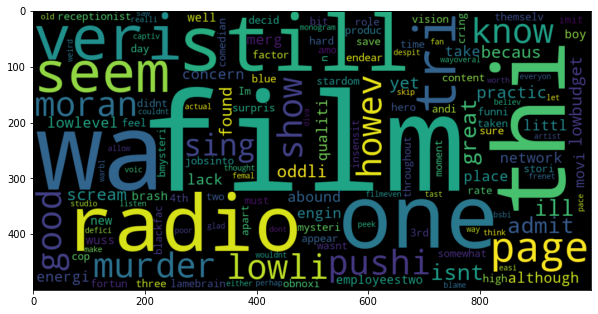

In [40]:
#word cloud for positive review words
plt.figure(figsize=(10,10))
positive_text=norm_train_reviews[1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

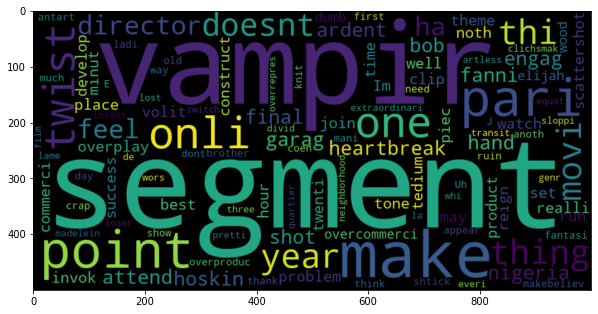

In [41]:
#Word cloud for negative review words
plt.figure(figsize=(10,10))
negative_text=norm_train_reviews[8]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show